From `KS` scores we discovered that top `86` variables out of `160` are `amount` related. Since we had a hypothesis of signals of credit card transaction frauds, we selected `40` variables that includes all types of signals as our variable portfolio.

Below are the `40` variables selected.

In [1]:
feature_40 = ['cardnum_amount_sum_7', 'merchantnum_amount_week_diff_sum_3',
       'merchantnum_amount_sum_3', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_max_1',
       'merchantnum_amount_month_diff_sum_3', 'merchantnum_amount_max_1',
       'merchantnum_amount_month_diff_max_1',
       'merchantnum_amount_week_diff_sum_1',
       'cardnum_amount_week_diff_sum_3', 'cardnum_amount_sum_3',
       'merchantnum_amount_month_diff_max_3', 'merchantnum_amount_max_3',
       'merchantnum_amount_month_diff_sum_1',
       'merchantnum_amount_week_diff_max_3',
       'cardnum_amount_month_diff_sum_3', 'merchantnum_amount_sum_1',
       'cardnum_amount_week_diff_sum_7', 'cardnum_amount_max_3',
       'cardnum_amount_week_diff_max_3','cardnum_amount_week_diff_max_1',
       'cardnum_amount_week_diff_sum_1',
       'cardnum_amount_month_diff_sum_7', 'merchantnum_amount_avg_1',
'merchantnum_amount_week_diff_avg_1',
       'cardnum_amount_month_diff_max_3',
       'merchantnum_amount_month_diff_sum_7',
       'merchantnum_amount_month_diff_avg_1',
'newmerch_30', 'newmerch_15',
       'cardnum_state_30', 'cardnum_state_15', 'newmerch_7', 'newmerch_1',
       'merchantnum_cardnum_3', 'newmerch_3', 'cardnum_merchantnum_15',
       'cardnum_merchantnum_30', 'cardnum_zip_30', 'cardnum_zip_7']
len(feature_40)

40

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re,time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
path = os.getcwd()+'/'

In [4]:
data = pd.read_csv(path+'train.csv')
ofd = pd.read_csv(path+'out_of_date.csv')

In [5]:
data.shape

(83767, 162)

In [6]:
data.head()

,Recordnum,cardnum_amount_avg_30,cardnum_amount_avg_15,cardnum_amount_avg_7,cardnum_amount_avg_3,cardnum_amount_avg_1,cardnum_amount_max_30,cardnum_amount_max_15,cardnum_amount_max_7,cardnum_amount_max_3,...,merchantnum_state_15,merchantnum_state_7,merchantnum_state_3,merchantnum_state_1,merchantnum_state_isna_30,merchantnum_state_isna_15,merchantnum_state_isna_7,merchantnum_state_isna_3,merchantnum_state_isna_1,Fraud
0,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0
1,2,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,1,1,1,1,0,0,0,0,0,0
2,3,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,1,1,1,1,0,0,0,0,0,0
3,4,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0
4,5,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1,1,1,1,0,0,0,0,0,0


In [7]:
ofd.shape

(12586, 162)

In [8]:
data_40 = pd.concat([data.loc[:,feature_40],data['Fraud']],axis=1)
ofd_40 = pd.concat([ofd.loc[:,feature_40],ofd['Fraud']],axis=1)

In [9]:
data_40.head()

,cardnum_amount_sum_7,merchantnum_amount_week_diff_sum_3,merchantnum_amount_sum_3,merchantnum_amount_sum_7,merchantnum_amount_week_diff_max_1,merchantnum_amount_month_diff_sum_3,merchantnum_amount_max_1,merchantnum_amount_month_diff_max_1,merchantnum_amount_week_diff_sum_1,cardnum_amount_week_diff_sum_3,...,cardnum_state_15,newmerch_7,newmerch_1,merchantnum_cardnum_3,newmerch_3,cardnum_merchantnum_15,cardnum_merchantnum_30,cardnum_zip_30,cardnum_zip_7,Fraud
0,3.62,-364.485464,3.62,3.62,-364.485464,-349.932108,3.62,-349.932108,-364.485464,-364.485464,...,1,1,1,1,1,1,1,1,1,0
1,31.42,-336.685464,31.42,31.42,-336.685464,-322.132108,31.42,-322.132108,-336.685464,-336.685464,...,1,1,1,1,1,1,1,1,1,0
2,178.49,-189.615464,178.49,178.49,-189.615464,-175.062108,178.49,-175.062108,-189.615464,-189.615464,...,1,1,1,1,1,1,1,1,1,0
3,3.62,-728.970927,7.24,7.24,-364.485464,-699.864216,3.62,-349.932108,-728.970927,-364.485464,...,1,0,0,2,0,1,1,1,1,0
4,7.24,-1093.456391,10.86,10.86,-364.485464,-1049.796324,3.62,-349.932108,-1093.456391,-728.970927,...,1,1,1,2,1,1,1,1,1,0


In [10]:
data_40.shape

(83767, 41)

In [11]:
1/np.mean(data_40['Fraud'])

123.91568047337277

In [12]:
x = data_40.iloc[:,:-1]
y = data_40.iloc[:,-1]

### here for measuring the performance of model (naive though) we do a train test split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [89]:
x_train.shape

(67013, 40)

In [91]:
x_test.shape

(16754, 40)

## 1. random forest

### The main hypothesis I wanna test here is whether balanced data performed better (given this highly imbalanced fraud dataset)

In [93]:
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0,n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [94]:
rf_2 = RandomForestClassifier(random_state=0,n_estimators=100)
rf_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
predicted = rf.predict(x_test)
print(metrics.classification_report(y_test, predicted,target_names = ['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     16620
          1       0.99      0.49      0.66       134

avg / total       1.00      1.00      1.00     16754



In [100]:
predicted = rf_2.predict(x_test)
print(metrics.classification_report(y_test, predicted,target_names = ['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     16620
          1       0.97      0.55      0.70       134

avg / total       1.00      1.00      1.00     16754



### from the performance matrics above, we can discover that surprisingly random forest performs better if the data is not balanced (by artificially given weight)

### below I list the feature importances

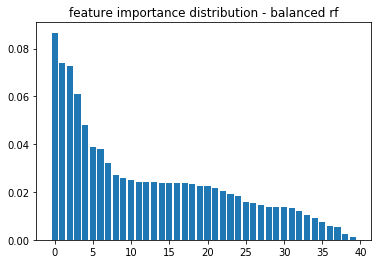

In [106]:
plt.bar(range(x_train.shape[1]), rf.feature_importances_[np.argsort(rf.feature_importances_)[::-1]])
plt.title('feature importance distribution - balanced rf')
plt.show()

In [117]:
x_train.columns[np.argsort(rf.feature_importances_)[::-1]][:20]

Index(['merchantnum_amount_sum_3', 'cardnum_amount_sum_3',
       'cardnum_amount_sum_7', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_sum_3',
       'merchantnum_amount_month_diff_sum_3',
       'merchantnum_amount_week_diff_sum_1',
       'merchantnum_amount_week_diff_max_1', 'cardnum_amount_week_diff_sum_3',
       'merchantnum_amount_max_1', 'merchantnum_amount_month_diff_max_3',
       'merchantnum_amount_month_diff_max_1', 'merchantnum_amount_sum_1',
       'cardnum_amount_month_diff_sum_7', 'newmerch_30', 'cardnum_state_30',
       'merchantnum_amount_max_3', 'cardnum_amount_week_diff_sum_7',
       'merchantnum_amount_month_diff_sum_1',
       'cardnum_amount_month_diff_sum_3'],
      dtype='object')

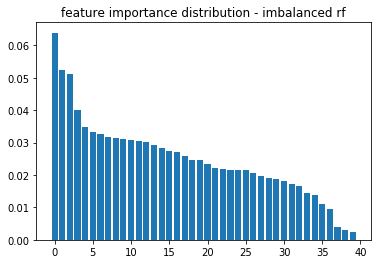

In [107]:
plt.bar(range(x_train.shape[1]), rf_2.feature_importances_[np.argsort(rf_2.feature_importances_)[::-1]])
plt.title('feature importance distribution - imbalanced rf')
plt.show()

In [119]:
x_train.columns[np.argsort(rf_2.feature_importances_)[::-1]][:20]

Index(['cardnum_amount_sum_3', 'cardnum_amount_week_diff_sum_3',
       'merchantnum_amount_sum_3', 'cardnum_amount_month_diff_sum_3',
       'cardnum_amount_sum_7', 'cardnum_amount_week_diff_max_3',
       'merchantnum_amount_week_diff_sum_3',
       'merchantnum_amount_month_diff_sum_3', 'cardnum_amount_week_diff_sum_1',
       'merchantnum_amount_max_3', 'cardnum_amount_month_diff_max_3',
       'cardnum_amount_max_3', 'merchantnum_amount_week_diff_max_3',
       'merchantnum_amount_month_diff_max_3',
       'merchantnum_amount_month_diff_sum_7', 'cardnum_merchantnum_30',
       'cardnum_amount_week_diff_max_1', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_max_1',
       'cardnum_amount_month_diff_sum_7'],
      dtype='object')

### Since imbalanced rf performed better on valiadation set, we will use the variables suggested by it

In [120]:
v_rf = list(x_train.columns[np.argsort(rf_2.feature_importances_)[::-1]][:20])

## 2. logistic regression

### Again I wanna test if imbalanced data performed better (little bit counter intuitive)

In [110]:
lr = RandomForestClassifier(class_weight = 'balanced',random_state=0)
lr.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [111]:
lr_2 = RandomForestClassifier(random_state=0)
lr_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
predicted = lr.predict(x_test)
print(metrics.classification_report(y_test, predicted,target_names = ['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     16620
          1       1.00      0.46      0.63       134

avg / total       1.00      1.00      0.99     16754



In [113]:
predicted = lr_2.predict(x_test)
print(metrics.classification_report(y_test, predicted,target_names = ['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     16620
          1       0.96      0.49      0.65       134

avg / total       1.00      1.00      1.00     16754



### counter intuitive as it is, we can't argue with data... imbalanced data do perform better (or at least not worse if we assume this phenomenon was caused by random_state)

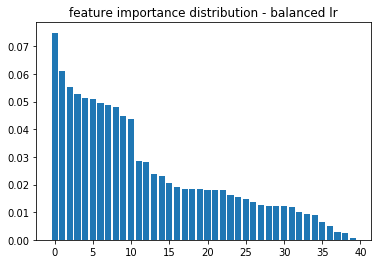

In [121]:
plt.bar(range(x_train.shape[1]), lr.feature_importances_[np.argsort(lr.feature_importances_)[::-1]])
plt.title('feature importance distribution - balanced lr')
plt.show()

In [122]:
x_train.columns[np.argsort(lr.feature_importances_)[::-1]][:20]

Index(['cardnum_amount_sum_7', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_max_1',
       'merchantnum_amount_week_diff_sum_1',
       'merchantnum_amount_week_diff_sum_3', 'merchantnum_amount_sum_1',
       'merchantnum_amount_month_diff_sum_1',
       'merchantnum_amount_month_diff_max_1', 'cardnum_amount_sum_3',
       'merchantnum_amount_max_1', 'cardnum_amount_week_diff_sum_3',
       'newmerch_30', 'merchantnum_amount_month_diff_max_3',
       'cardnum_state_30', 'cardnum_amount_week_diff_sum_7',
       'merchantnum_amount_sum_3', 'cardnum_amount_week_diff_max_3',
       'merchantnum_amount_month_diff_sum_7',
       'cardnum_amount_month_diff_sum_7', 'merchantnum_amount_avg_1'],
      dtype='object')

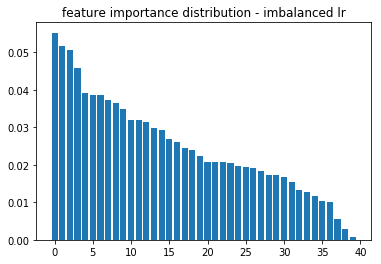

In [123]:
plt.bar(range(x_train.shape[1]), lr_2.feature_importances_[np.argsort(lr_2.feature_importances_)[::-1]])
plt.title('feature importance distribution - imbalanced lr')
plt.show()

In [124]:
x_train.columns[np.argsort(lr_2.feature_importances_)[::-1]][:20]

Index(['cardnum_amount_sum_3', 'cardnum_amount_week_diff_sum_3',
       'cardnum_amount_week_diff_sum_1', 'merchantnum_amount_week_diff_sum_3',
       'cardnum_merchantnum_30', 'cardnum_amount_month_diff_max_3',
       'merchantnum_amount_sum_3', 'cardnum_amount_month_diff_sum_3',
       'merchantnum_amount_sum_7', 'cardnum_amount_sum_7',
       'merchantnum_amount_max_3', 'merchantnum_amount_week_diff_sum_1',
       'cardnum_amount_week_diff_max_3', 'merchantnum_amount_week_diff_max_3',
       'cardnum_amount_max_3', 'merchantnum_amount_month_diff_max_3',
       'merchantnum_amount_month_diff_sum_3', 'cardnum_zip_30',
       'cardnum_merchantnum_15', 'merchantnum_amount_week_diff_max_1'],
      dtype='object')

### suggested by data, we inclined to imbalanced data. There's one more thing to note that balanced data tend to give best variable higher importance...

In [125]:
v_lr = list(x_train.columns[np.argsort(lr_2.feature_importances_)[::-1]][:20])

## 3. manual selection

### In this part I manually selected better performing variables in each hypothetical fraud signal 

In [130]:
x_train.columns[np.argsort(rf_2.feature_importances_)[::-1]]

Index(['cardnum_amount_sum_3', 'cardnum_amount_week_diff_sum_3',
       'merchantnum_amount_sum_3', 'cardnum_amount_month_diff_sum_3',
       'cardnum_amount_sum_7', 'cardnum_amount_week_diff_max_3',
       'merchantnum_amount_week_diff_sum_3',
       'merchantnum_amount_month_diff_sum_3', 'cardnum_amount_week_diff_sum_1',
       'merchantnum_amount_max_3', 'cardnum_amount_month_diff_max_3',
       'cardnum_amount_max_3', 'merchantnum_amount_week_diff_max_3',
       'merchantnum_amount_month_diff_max_3',
       'merchantnum_amount_month_diff_sum_7', 'cardnum_merchantnum_30',
       'cardnum_amount_week_diff_max_1', 'merchantnum_amount_sum_7',
       'merchantnum_amount_week_diff_max_1', 'cardnum_amount_month_diff_sum_7',
       'cardnum_zip_30', 'cardnum_amount_week_diff_sum_7',
       'merchantnum_amount_avg_1', 'merchantnum_amount_month_diff_max_1',
       'merchantnum_amount_sum_1', 'merchantnum_amount_max_1',
       'merchantnum_amount_month_diff_avg_1', 'cardnum_merchantnum_15',
 

In [131]:
v_m = [
#abnormal amounts, from merchants
'merchantnum_amount_sum_3','merchantnum_amount_week_diff_sum_3',
#abnormal amounts, from cardnums
'cardnum_amount_sum_3','cardnum_amount_week_diff_sum_3',
#burst of unseen merchants -> Employee or merchant invents a fictitious merchant
'newmerch_30', 'newmerch_15',
#Burst of  merchants, by cardnums
'cardnum_merchantnum_30','cardnum_merchantnum_15',
#burst of different locations, by merchants  <---can't find, not a good hypothesis I guess

#burst of different locations, by cardnums
'cardnum_zip_30','cardnum_state_30'
]

## 4. output

In [134]:
data.shape

(83767, 162)

In [135]:
ofd.shape

(12586, 162)

In [136]:
data_40 = pd.concat([data.loc[:,feature_40],data['Fraud']],axis=1)
data_rf = pd.concat([data.loc[:,v_rf],data['Fraud']],axis=1)
data_lr = pd.concat([data.loc[:,v_lr],data['Fraud']],axis=1)
data_m =  pd.concat([data.loc[:,v_m],data['Fraud']],axis=1)
ofd_40 = pd.concat([ofd.loc[:,feature_40],ofd['Fraud']],axis=1)
ofd_rf = pd.concat([ofd.loc[:,v_rf],ofd['Fraud']],axis=1)
ofd_lr = pd.concat([ofd.loc[:,v_lr],ofd['Fraud']],axis=1)
ofd_m =  pd.concat([ofd.loc[:,v_m],ofd['Fraud']],axis=1)

In [139]:
pd.DataFrame([data_40.shape,data_rf.shape,data_lr.shape,data_m.shape,
             ofd_40.shape,ofd_rf.shape,ofd_lr.shape,ofd_m.shape],
            columns = ['rows','columns'],
             index=['data_40','data_rf','data_lr','data_m',
                   'ofd_40','ofd_rf','ofd_lr','ofd_m'])

,rows,columns
data_40,83767,41
data_rf,83767,21
data_lr,83767,21
data_m,83767,11
ofd_40,12586,41
ofd_rf,12586,21
ofd_lr,12586,21
ofd_m,12586,11


In [140]:
data_40.to_csv('train_40.csv')
data_rf.to_csv('train_rf.csv')
data_lr.to_csv('train_lr.csv')
data_m.to_csv('train_m.csv')
ofd_40.to_csv('out_of_date_40.csv')
ofd_rf.to_csv('out_of_date_rf.csv')
ofd_lr.to_csv('out_of_date_lr.csv')
ofd_m.to_csv('out_of_date_m.csv')